# hw 5: kernel density estimation (KDE)

In [1]:
#Kingsley Chukwu HW_5

using CSV
using DataFrames
using PyPlot
using Statistics
using Random
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"
using Printf

# (optional)change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

# use PyCall to call in Seaborn
import Pkg
Pkg.add("PyCall")
Pkg.add("Seaborn")

# note: some have done the following to bring `kdeplot` and `rugplot` into the namespace
#  but I recommend the above. you need to install Seaborn, the Python package.
# using Seaborn

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
using PyCall
using PyCall
seaborn = pyimport("seaborn")

PyObject <module 'seaborn' from '/Users/kingsleychukwu/.julia/conda/3/lib/python3.7/site-packages/seaborn/__init__.py'>

## data on forest fires in the northeast region of Portugal

(1) read in `forestfires.csv` as a `DataFrame`. [source](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

* each row corresponds to the occurance of a forest fire. 
* the `:temp` attribute is the temperature in Celsius degrees when the forest fire occurred
* the `:RH` attribute is the relative humidity in % when the forest fire occurred

In [4]:
df = CSV.read("forestfires.csv", copycols=true)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH
,Int64,Int64,String,String,Float64,Float64,Float64,Float64,Float64,Int64
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29
7,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27
8,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86
9,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63


## using Seaborn to do KDE

(2) use Seaborn's [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function and [rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) function to, on the same plot, draw a rugplot and 1D KDE of the temperature during forest fires in Portugal.

* shade in the area under the curve (see `shade` in the documentation)
* use the cosine kernel, denoted as `"cos"` in Seaborn (see `kernel` in the documentation) the cosine kernel has finite, compact support, unlike the Gaussian kernel
* label the x, y-axes with appropriate units (note: both have units!)

note regarding translation of Seaborn (Python) documentation to Julia: keep in mind that we need to pass strings `kernel="gau"` in Julia as opposed to `kernel='gau'` which works in Python.

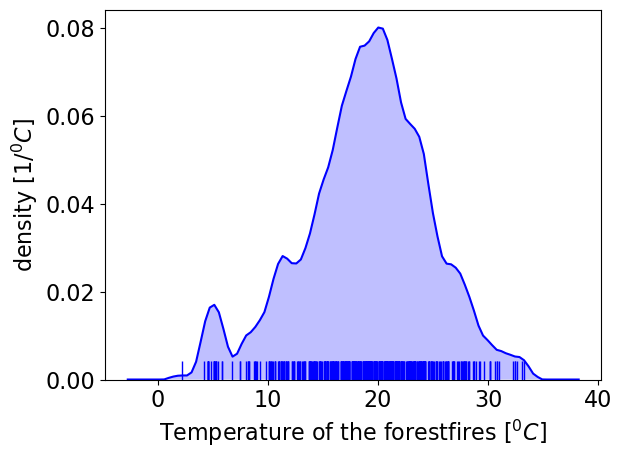

PyObject Text(40.2, 0.5, 'density [1/$^{0}C$]')

In [19]:
seaborn.kdeplot(df[:, :temp], shade=true, color="b", kernel = "cos")
seaborn.rugplot(df[:, :temp], color = "b")
xlabel(L"Temperature of the forestfires $[^{0}C]$")
ylabel(L"density [1/$^{0}C$]")

(3) draw a scatter plot to visualize the relationship, during forest fires, between:
* x-axis: temperature
* y-axis: relative humidity

label the x- and y-axes along with units.

use green "+" markers.

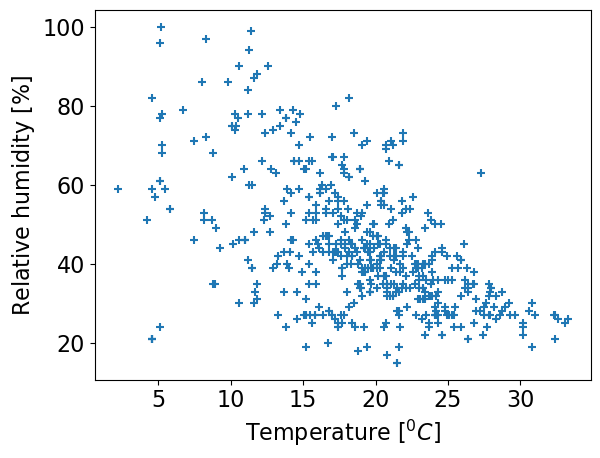

PyObject Text(37.000000000000014, 0.5, 'Relative humidity $[\\%]$')

In [27]:
scatter(df[:, :temp],df[:, :RH], marker="+")
xlabel(L"Temperature $[^{0}C]$")
ylabel(L"Relative humidity $[\%]$")

(4) now draw a bivariate KDE using Seaborn's [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function that corresponds to your scatter plot in (3).
* devote the x-axis to temperature
* devote the y-axis to relative humidity
* label the x, y- axes with units
* pass `shade=true` to shade between the contours
* pass `shade_lowest=false` to avoid shading regions of temperature-relative humidity space where forest fires were very unlikely to occur.
* pass `cmap="Greens"` to change the colormap to use green colors for the shading.

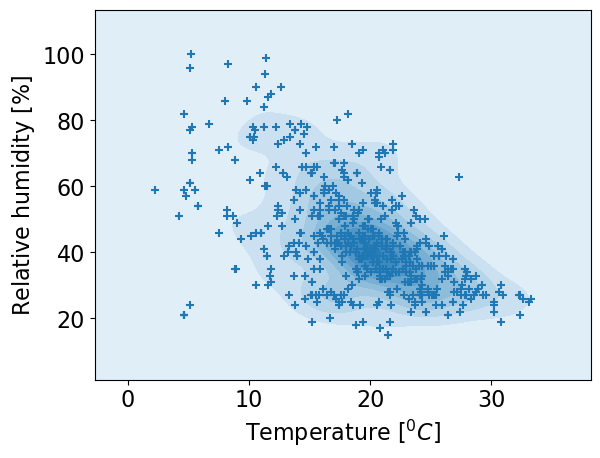

PyObject Text(37.000000000000014, 0.5, 'Relative humidity $[\\%]$')

In [28]:
seaborn.kdeplot(df[:, :temp], df[:, :RH], shade=true, shade_lowest=true, bw="scott")
scatter(df[:, :temp], df[:, :RH], marker="+")
xlabel(L"Temperature $[^{0}C]$")
ylabel(L"Relative humidity $[\%]$")

## coding up your own 1D top hat KDE
To intimately understand KDE, let's code up own own KDE with a new kernel we haven't seen before, the top hat function, which looks like a top hat. See what the top hat kernel looks like [here](https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_002.png). The top hat function has finite and compact [support](https://en.wikipedia.org/wiki/Support_(mathematics)) and is (piecewise) flat. The top hat kernel is implemented in scikitlearn's kernel density estimate module if you are interesting in checking your code. let $X$ denote the random variable whose density we seek to estimate (via top hat kernel density estimation).

(5) write a function `K_top_hat(x::Float64, x_i::Float64, λ::Float64)` the returns the value of the top hat kernel density at `x` conributed by data point `x_i`. `λ` is the bandwidth of the top hat kernel, which is half of its width. think carefully about what the height should be...

In [42]:
function K_top_hat(m::Float64, mᵢ::Float64, λ::Float64)
    # the distance between m and mᵢ, normalized by bandwidth, scaled
   u = ((m - mᵢ) / λ) ^ 2
     if u < 1/λ
            return 1/λ
        else
            return 0
    end
end


K_top_hat (generic function with 1 method)

In [36]:
#λ = (4 * std(df[:, :temp]) ^ 5 / (3 * nrow(df))) ^ (1 / 5)
#temp = range(1.0, stop=1.0, length=40)
#maximum(df[:, :temp])

1.7628422246352347

(6) write a function `top_hat_kde(x::Float64, x_sample::Array{Float64}, λ::Float64)` that takes in the point `x` at which we seek to estimate the density, the array of samples of $x$ (the data and the `x_i`'s for `K_top_hat`) `x_sample`, and the bandwidth `λ` of the top hat kernel used to make the density estimate, then returns the top hat kernel density estimate at `x`.

In [41]:
function top_hat_kde(x::Float64, x_sample::Array{Float64}, λ::Float64)
    density_estimate = 0.0
    for i = 1:length(x_sample)
        density_estimate += K_top_hat(x, x_sample[i], λ)
    end
    return density_estimate / length(x_sample)
end

top_hat_kde (generic function with 1 method)

(7) finally, use your function `top_hat_kde` to estimate the density of temperatures during forest fires in Portugal at a dense span of temperatures ranging from 0 to 50.0. Use a bandwidth of 1.5. plot the density as in question (2) and compare. What strikes you as a qualitative difference between the KDE using top hat vs. cosine kernel in (2)?

note: in comparing the scale on the y-axis here and in your plot from question (2) generated with Seaborn, you should get a hint of whether or not you chose the height of the top hat kernel correctly. Remember that the total kernel density should integrate to 1.0.

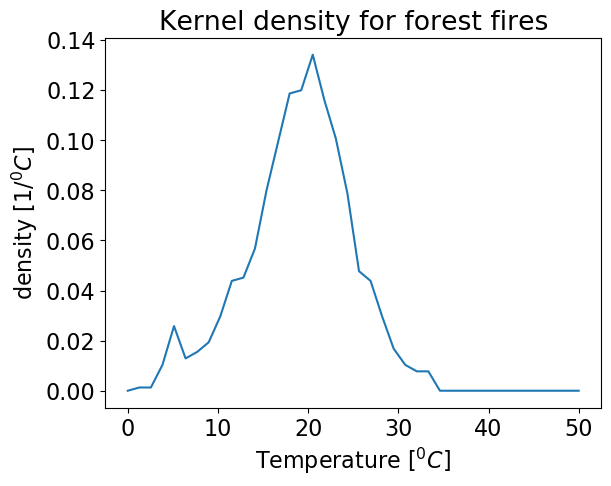

40-element Array{Float64,1}:
 0.0                  
 0.0012894906511927789
 0.0012894906511927789
 0.010315925209542231 
 0.02578981302385557  
 0.01289490651192779  
 0.015473887814313346 
 0.01934235976789168  
 0.0296582849774339   
 0.04384268214055449  
 0.04513217279174727  
 0.0567375886524823   
 0.07994842037395226  
 ⋮                    
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  

In [47]:
temps = range(0.0, stop=50.0, length=40)
pk =0
#temps = range(10.0, stop=140.0, length=250)

# do the KDE
#fig, axs = subplots(2, 1, figsize=(10, 8), 
#                    sharex=true, sharey=true, tight_layout=true)

λ = 1.5

ρ = [top_hat_kde(temp, df[:, :temp], λ) for temp in temps]
pk = ρ
    # plot estimated densities vs. masses
plot(temps, ρ)
xlabel(L"Temperature $[^{0}C]$")
ylabel(L"density [1/$^{0}C$]")
title("Kernel density for forest fires")

pk